- einsum: Einstein summation convention
    - 一个是更多地聚焦在矩阵乘法和加法上，
    - 矩阵乘法，而乘法又是通过加法来完成的；
    - `ij,jk->ik`
- einops: Einstein Operations
    - 一个则是更广泛的矩阵操作（Tensor operation）；

## einsum 补充

- https://rockt.github.io/2018/04/30/einsum
- https://pytorch.org/docs/stable/generated/torch.einsum.html

In [1]:
import torch

### `ij, j->i`

In [47]:
a = torch.randint(0, 4, [3, 4])
b = torch.randint(0, 3, [4,])

In [48]:
a

tensor([[1, 0, 1, 0],
        [3, 1, 3, 1],
        [2, 3, 1, 2]])

In [49]:
b

tensor([0, 1, 0, 2])

In [50]:
# 1. broadcast, 2. element-wise multiplication
a * b

tensor([[0, 0, 0, 0],
        [0, 1, 0, 2],
        [0, 3, 0, 4]])

In [51]:
a @ b

tensor([0, 3, 7])

In [52]:
torch.einsum('ij,j->i', a, b)

tensor([0, 3, 7])

### `ij,i->j`

In [53]:
a = torch.randint(0, 4, [3, 4])
b = torch.randint(0, 4, [3,])
torch.einsum('ij,i->j', a, b)

tensor([7, 8, 6, 5])

In [55]:
a

tensor([[2, 1, 0, 0],
        [1, 0, 0, 1],
        [1, 3, 3, 2]])

In [56]:
b

tensor([2, 1, 2])

In [57]:
b.reshape(1, -1) @ a

tensor([[7, 8, 6, 5]])

### `nc,nc->n`

- `nc,nc->nc`: element-wise multiplication
- `nc => n`：row sum => row reduce 

In [64]:
a = torch.randint(0, 3, [2, 3])
b = torch.randint(0, 3, [2, 3])

In [65]:
a

tensor([[2, 2, 1],
        [0, 2, 0]])

In [66]:
b

tensor([[2, 0, 2],
        [2, 2, 2]])

In [67]:
a*b

tensor([[4, 0, 2],
        [0, 4, 0]])

In [68]:
torch.sum(a*b, dim=1)

tensor([6, 4])

In [69]:
torch.einsum('nc,nc->n', [a, b])

tensor([6, 4])

## einops

- https://github.com/arogozhnikov/einops
    - https://github.com/arogozhnikov/einops/tree/master/docs

### ViT

In [9]:
from einops import rearrange
from torchvision import transforms
from PIL import Image

In [70]:
image = Image.open('./imgs/boo.jpg')
image.size

(1500, 1500)

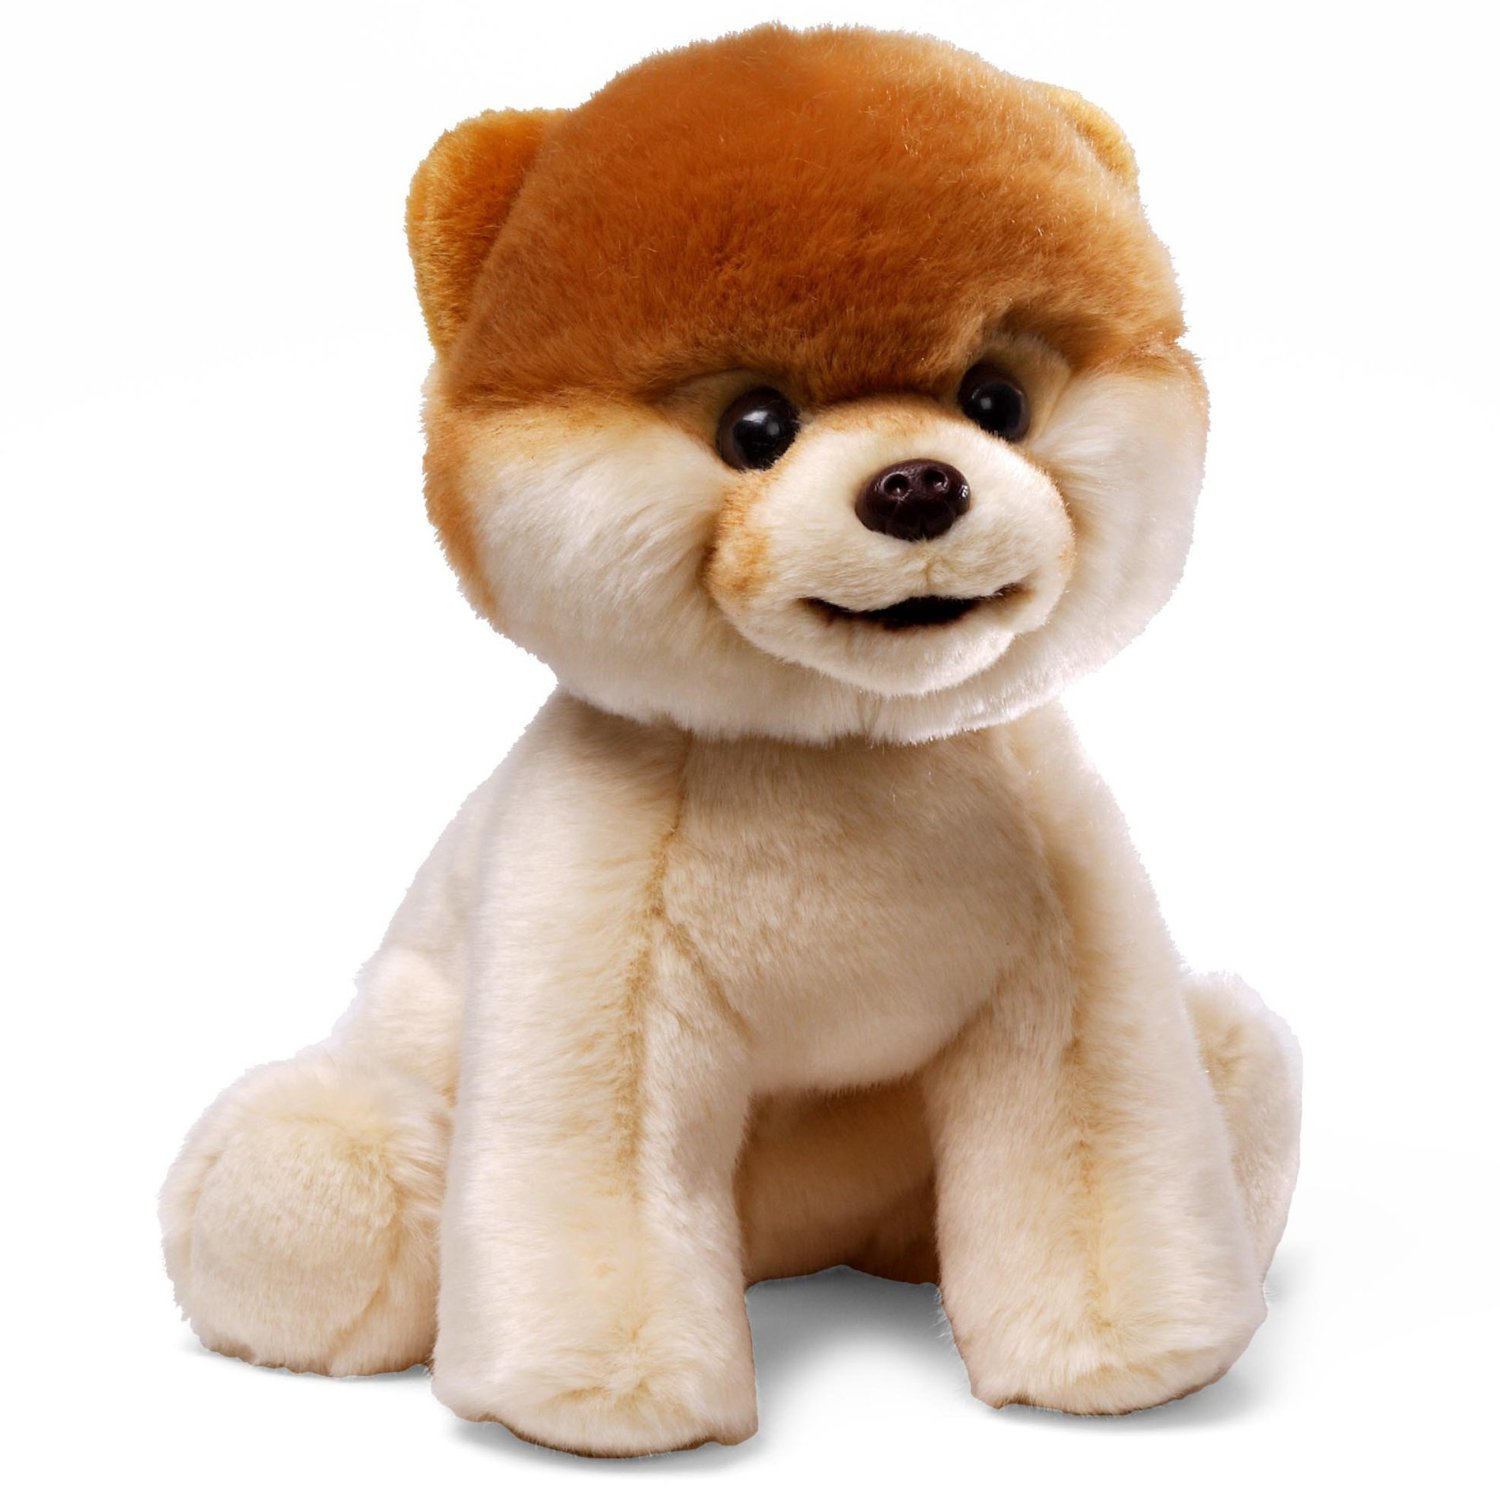

In [71]:
image

In [72]:
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
#         transforms.RandomResizedCrop(224),
#         transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
    ]
)

In [73]:
224/16

14.0

In [74]:
img = transform(image)

In [14]:
patch_sz = 14

In [75]:
x_patch = rearrange(img, 'c (h p1) (w p2) -> (h w) (p1 p2 c)', p1=patch_sz, p2=patch_sz)

In [76]:
x_patch.shape

torch.Size([256, 588])

In [77]:
16*16

256

In [18]:
14*14*3

588

In [19]:
import matplotlib.pyplot as plt

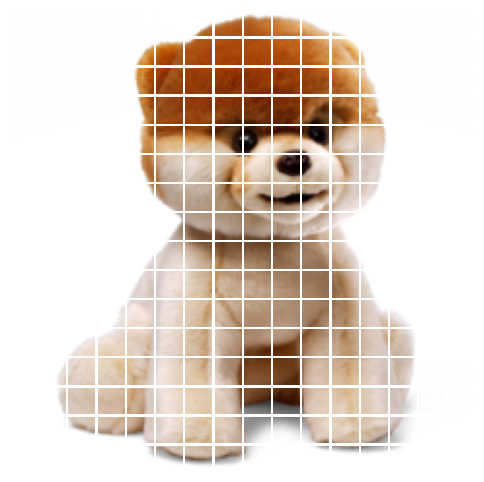

In [78]:
plt.figure(figsize=(6, 6))

for i, patch in enumerate(x_patch):
    # 将patch的形状从 (p1*p2*c) 调整为 (p1, p2, c) 以便于matplotlib可以正确绘制
    patch_img = patch.reshape(patch_sz, patch_sz, 3)
    
    # 添加subplot
    plt.subplot(16, 16, i+1)
    plt.imshow(patch_img)
    plt.axis('off')  # 不显示坐标轴
plt.subplots_adjust(wspace=0.1, hspace=0.1)
# plt.tight_layout()
plt.show()

In [79]:
img = img.unsqueeze(0)
img.shape

torch.Size([1, 3, 224, 224])

In [80]:
x_patch = rearrange(img, 'b c (h p1) (w p2) -> b (h w) (p1 p2 c)', p1=patch_sz, p2=patch_sz)

In [82]:
x_patch.shape

torch.Size([1, 256, 588])